In [54]:
# Code for finite differencing. 

%matplotlib notebook
from numpy import *
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [67]:
ng = 41;
dh = (1)/(ng-1);
x = numpy.arange(0,1+dh,dh);
y = numpy.arange(0,1+dh,dh);

u = numpy.empty((ng, ng));
d2u = numpy.zeros_like(u);
d2uC = numpy.zeros_like(u);
d2ux = numpy.zeros_like(u);
d2uy = numpy.zeros_like(u);

# Define u
for i in range (ng):
    for j in range (ng):
        #u[i][j] = numpy.sin(2*numpy.pi*x[i])*numpy.sin(2*numpy.pi*y[j]);
        u[i][j] = sin(2*pi*x[i])*sin(2*pi*y[j]);

<IPython.core.display.Javascript object>


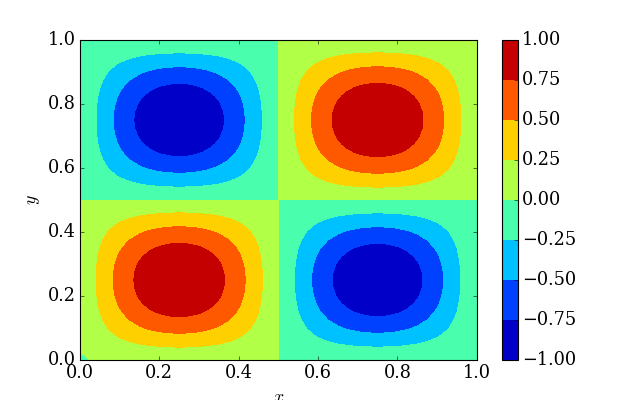

In [68]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,u)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

In [69]:
# Finite different approx:
for i in range (1, ng-1):
    for j in range (1, ng-1):
        d2u[i][j] = (u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1] - 4*u[i,j])/(dh*dh);

<IPython.core.display.Javascript object>


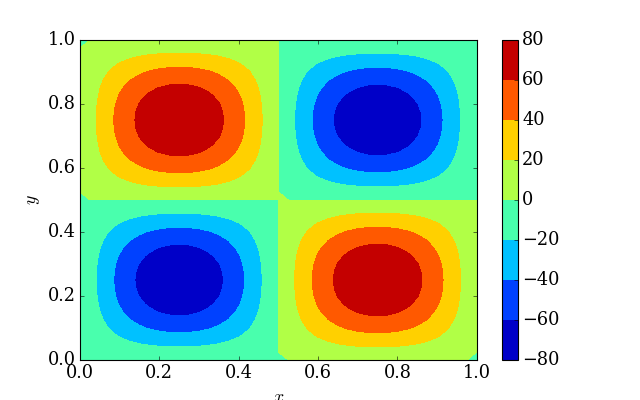

In [70]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,d2u)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

In [71]:
#Compact finite difference approximation

A = numpy.zeros((ng,ng)); bx = numpy.zeros(ng); by = numpy.zeros(ng);

#Evaluate d2u/dx2
for i in range (1, ng-1):
    A[0,0] = 1; A[-1,-1] = 1;
    for j in range (1, ng-1):
        A[j][j-1:j+2] = [0.1, 1.0, 0.1];
        bx[j] = 1.2/(dh*dh)*(u[i-1,j]-2*u[i,j]+u[i+1,j]);
    Ainv = numpy.linalg.inv(A);
    d2ux[i,:] = Ainv.dot(bx);
    
#print(A);
    
#Evaluate d2u/dy2
for j in range (1, ng-1):
    A[0,0] = 1; A[-1,-1] = 1;
    for i in range (1, ng-1):
        A[i][i-1:i+2] = [0.1, 1.0, 0.1];
        by[i] = 1.2/(dh*dh)*(u[i-1,j]-2*u[i,j]+u[i+1,j]);
    Ainv = numpy.linalg.inv(A);
    d2uy[:,j] = Ainv.dot(by);
    
#print(d2ux);
d2uC = d2ux + d2uy;

<IPython.core.display.Javascript object>


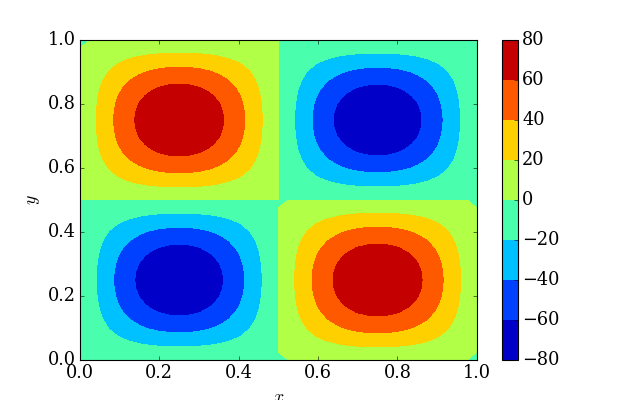

In [72]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,d2uC)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

In [73]:
#Error analysis:

ErrFD = 0.0; ErrCFD = 0.0;
for i in range (1,ng-1):
    for j in range (1, ng-1):
        d2uex = -8*pi**2*sin(2*pi*x[i])*sin(2*pi*y[j]);
        ErrFD = ErrFD + (d2uex-d2u[i,j])**2;
        ErrCFD = ErrCFD + (d2uex-d2uC[i,j])**2;
        
ErrFD = (ErrFD/(ng-1)**2)**0.5;
ErrCFD = (ErrCFD/(ng-1)**2)**0.5;

print(ErrFD);
print(ErrCFD);

0.0811075087982
0.000100242592315
